# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"  # 'units=metric' will return temperature in Celsius
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=2f9514979f3c40c3d814951030c65705&q=bethel&units=metric
Processing Record 1 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=2f9514979f3c40c3d814951030c65705&q=carnarvon&units=metric
Processing Record 2 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=2f9514979f3c40c3d814951030c65705&q=barika&units=metric
Processing Record 3 of Set 1 | barika
http://api.openweathermap.org/data/2.5/weather?appid=2f9514979f3c40c3d814951030c65705&q=faya-largeau&units=metric
Processing Record 4 of Set 1 | faya-largeau
http://api.openweathermap.org/data/2.5/weather?appid=2f9514979f3c40c3d814951030c65705&q=smithers&units=metric
Processing Record 5 of Set 1 | smithers
http://api.openweathermap.org/data/2.5/weather?appid=2f9514979f3c40c3d814951030c65705&q=iskateley&units=metric
Processing Record 6 of Set 1 | iskateley
http://api.openweathermap.org/data/2

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,9.70,88,100,2.05,US,1697332943
1,carnarvon,-24.8667,113.6333,32.78,27,0,4.20,AU,1697333541
2,barika,35.3890,5.3658,20.48,26,0,2.71,DZ,1697333541
3,faya-largeau,17.9257,19.1043,29.36,23,6,9.66,TD,1697332980
4,smithers,54.7804,-127.1743,14.18,58,75,2.06,CA,1697333541


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()





,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.70,88,100,2.05,US,1697332943
1,carnarvon,-24.8667,113.6333,32.78,27,0,4.20,AU,1697333541
2,barika,35.3890,5.3658,20.48,26,0,2.71,DZ,1697333541
3,faya-largeau,17.9257,19.1043,29.36,23,6,9.66,TD,1697332980
4,smithers,54.7804,-127.1743,14.18,58,75,2.06,CA,1697333541


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

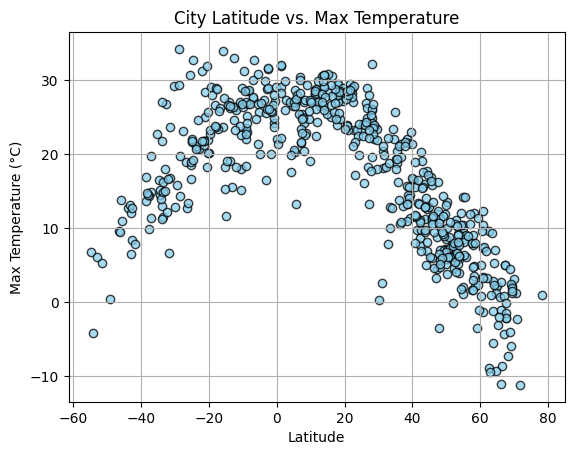

In [80]:
import matplotlib.pyplot as plt

# Scatter Plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue", alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

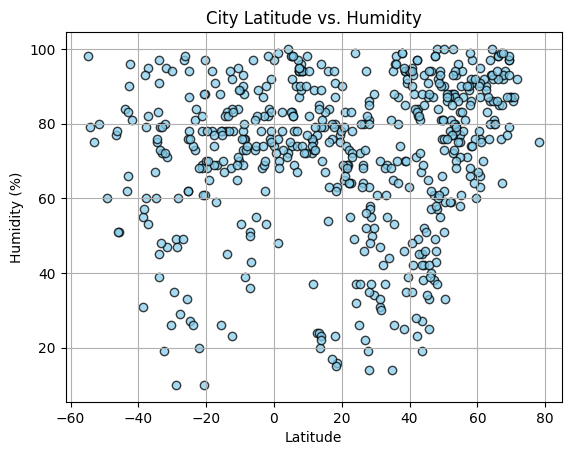

In [81]:
# Scatter Plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue", alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

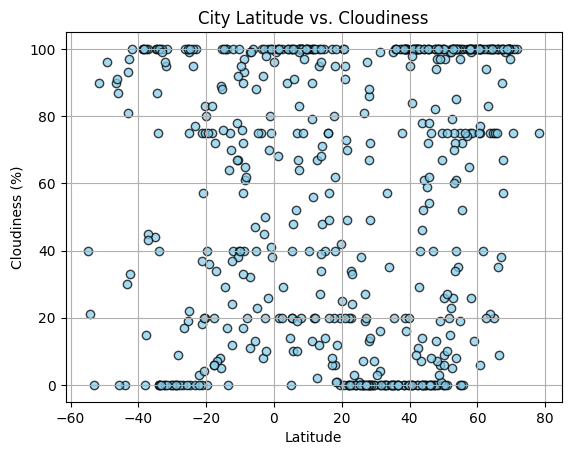

In [82]:
# Scatter Plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue", alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

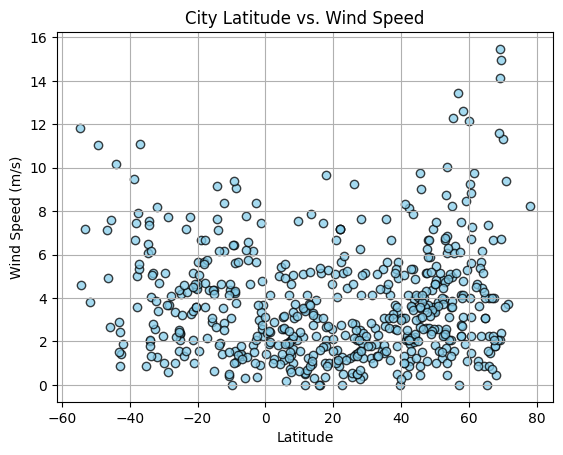

In [83]:
# Scatter Plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="skyblue", alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label):
    # Calculate the regression line "y values" from the slope and intercept.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Dynamically set the text_coordinates.
    x_pos = x_values.min() + 0.1 * (x_values.max() - x_values.min())
    y_pos = y_values.min() + 0.1 * (y_values.max() - y_values.min())
    
    # Annotate the text for the line equation with a larger font and a white box for better visibility.
    plt.annotate(line_eq, (x_pos, y_pos), fontsize=20, color="red", bbox=dict(facecolor='white', edgecolor='none', pad=5))
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [85]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,9.70,88,100,2.05,US,1697332943
2,barika,35.3890,5.3658,20.48,26,0,2.71,DZ,1697333541
3,faya-largeau,17.9257,19.1043,29.36,23,6,9.66,TD,1697332980
4,smithers,54.7804,-127.1743,14.18,58,75,2.06,CA,1697333541
5,iskateley,67.6803,53.1512,-2.21,93,67,1.79,RU,1697332737


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,32.78,27,0,4.20,AU,1697333541
6,edinburgh of the seven seas,-37.0676,-12.3116,14.88,95,100,11.09,SH,1697332951
7,lebu,-37.6167,-73.6500,9.82,79,15,7.93,CL,1697332952
8,avarua,-21.2078,-159.7750,25.03,69,75,5.14,CK,1697332740
15,waitangi,-43.9535,-176.5597,12.75,84,0,10.15,NZ,1697333542


###  Temperature vs. Latitude Linear Regression Plot

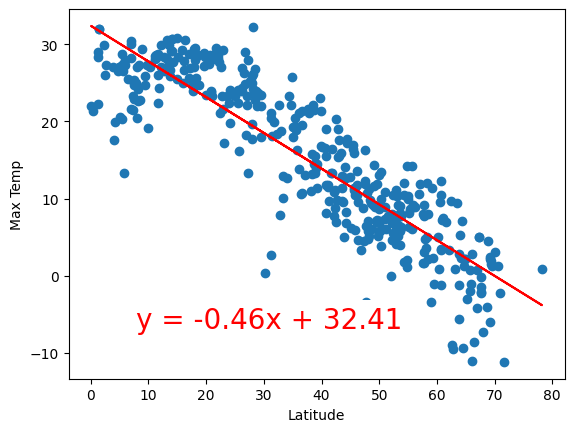

In [87]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                        '','Max Temp')

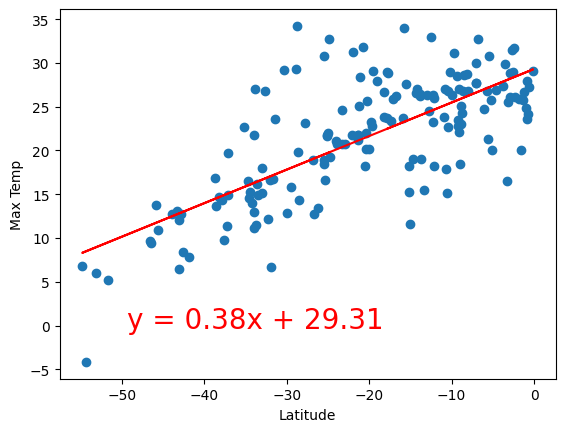

In [88]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Max Temp')

**Discussion about the linear relationship:** Between Latitude and Max Temp for the Northern Hemisphere the equation is -0.45x + 32.07 , and for 
Southern Hemisphere the equation is 0.39x + 29.13 , so we can say Northern Hemisphere:
As latitude increases (moving northwards), the maximum temperature tends to decrease. This indicates cooler climates farther from the equator.

Southern Hemisphere:
As latitude increases (moving northwards from the South Pole to the equator), the maximum temperature rises, signifying warmer conditions near the equator.

### Humidity vs. Latitude Linear Regression Plot

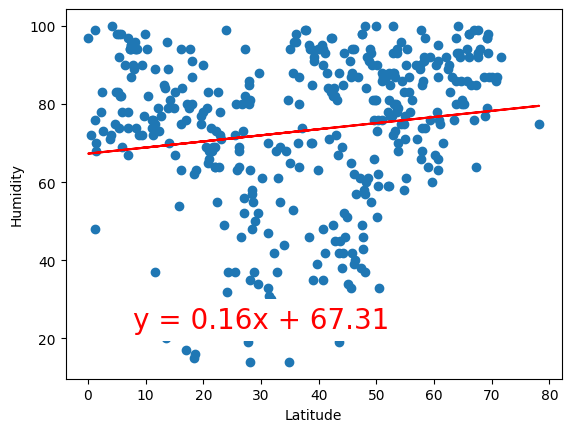

In [89]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Humidity')

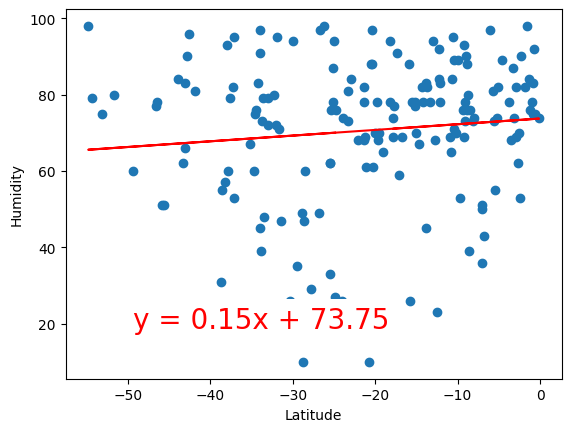

In [90]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Humidity')


**Discussion about the linear relationship:** Between Latitude and Humidity for the Northern Hemisphere the equation is 0.09x + 69.37 , and for 
Southern Hemisphere the equation is 0.22x + 73.21 , so we can say Northern Hemisphere:
As latitude increases (moving northwards), there's a slight increase in humidity, suggesting regions farther from the equator might be a bit more humid. However, with a slope of 0.09, the change is relatively subtle.

Southern Hemisphere:
In the southern hemisphere, as latitude increases (moving northwards from the South Pole to the equator), humidity also increases. With a steeper slope of 0.22 compared to the northern hemisphere, this suggests a more pronounced rise in humidity as one approaches the equator in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

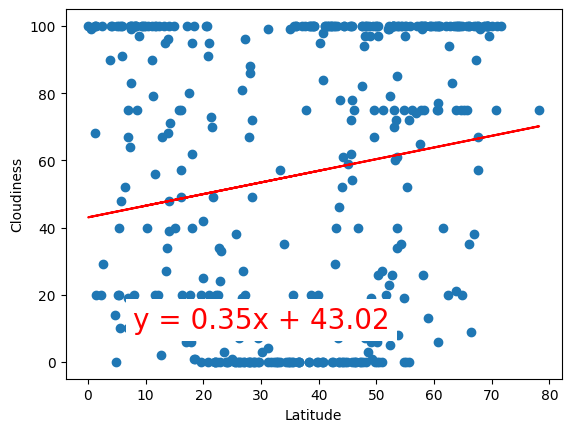

In [91]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Cloudiness')


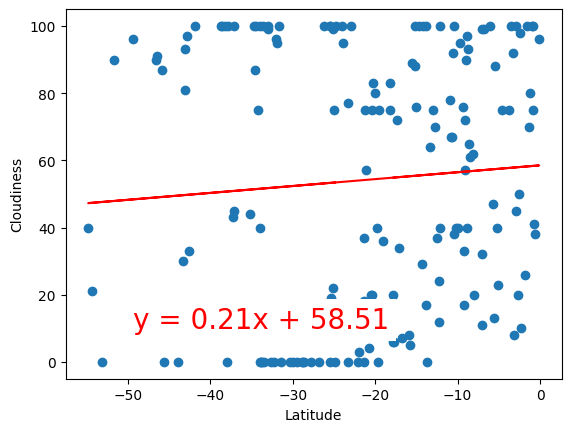

In [92]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Cloudiness')


**Discussion about the linear relationship:** Between Latitude and cloudiness for the Northern Hemisphere the equation is 0.36x + 43.26 , and for Southern Hemisphere the equation is -0.06x + 54.34, so we can say Northern Hemisphere:
As latitude increases (moving northwards), there's a moderate increase in cloudiness. The positive slope of 0.36 suggests that for every unit increase in latitude, cloudiness increases by 0.36%. This indicates that regions farther from the equator in the Northern Hemisphere might experience slightly more cloud cover.

Southern Hemisphere:
In the southern hemisphere, as latitude increases (moving northwards from the South Pole to the equator), there's a minor decrease in cloudiness. The negative slope of -0.06 indicates a slight reduction in cloud cover as one approaches the equator, suggesting clearer skies near the equatorial regions. However, the change is quite subtle.

### Wind Speed vs. Latitude Linear Regression Plot

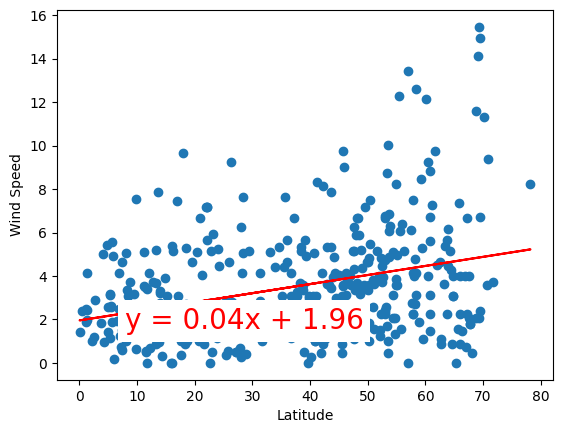

In [93]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Wind Speed')


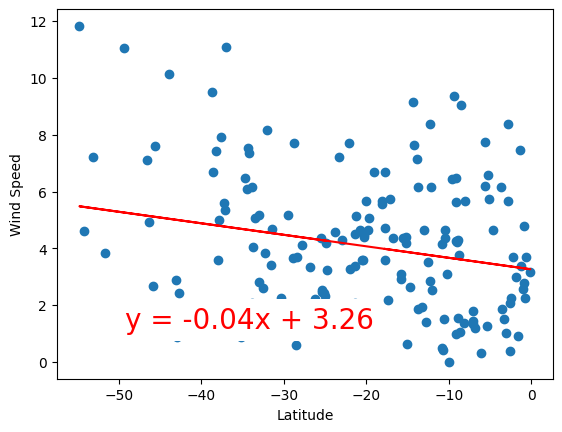

In [94]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Using the function we defined earlier
plot_linear_regression(x_values, y_values, 
                       '', 'Wind Speed')


**Discussion about the linear relationship:** Between Latitude and windspeed for the Northern Hemisphere the equation is 0.03x + 2.09 , and for Southern Hemisphere the equation is -0.05x + 2.97, so we can say Northern Hemisphere:
As latitude increases (moving northwards), there's a minimal increase in wind speed. The positive slope of 0.03 suggests a very subtle rise in wind speed as one moves farther from the equator. This indicates that, on average, regions in the Northern Hemisphere might experience a slight uptick in wind speeds as they are more distant from the equator.

Southern Hemisphere:
In the southern hemisphere, as latitude increases (moving northwards from the South Pole to the equator), there's a minor decrease in wind speed. The negative slope of -0.05 indicates a gentle reduction in wind speeds as one approaches the equator, suggesting calmer wind conditions near the equatorial regions.